In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import keras.models
import tensorflow as tf
import joblib
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dt=pd.read_csv("/content/drive/MyDrive/nevada_weather2020_1.csv",header=0)
dt = dt[dt['is_day'] == True]
dt

,Year,DHI,DNI,Temperature,Relative Humidity,GHI,Solar Zenith Angle,Datetime,is_day
42,2020,5,0,4.4,46.38,5,88.97,1/1/20 7:00,True
43,2020,17,0,4.7,45.42,17,87.36,1/1/20 7:10,True
44,2020,26,14,5.0,44.48,27,85.72,1/1/20 7:20,True
45,2020,37,107,5.3,43.57,48,84.07,1/1/20 7:30,True
46,2020,47,135,5.6,44.25,65,82.44,1/1/20 7:40,True
...,...,...,...,...,...,...,...,...,...
52511,2020,26,0,11.5,39.31,26,82.76,31/12/20 15:50,True
52512,2020,25,528,6.8,45.31,76,84.49,31/12/20 16:00,True
52513,2020,20,447,6.8,45.31,50,86.13,31/12/20 16:10,True
52514,2020,15,345,6.7,45.62,28,87.77,31/12/20 16:20,True


In [ ]:
dt_input=dt.iloc[:,[5,1,2,3,4,6]]
import numpy as np
data_array = np.array(dt_input)
print(data_array)
features=data_array
target=data_array[:,0]

[[  5.     5.     0.     4.4   46.38  88.97]
 [ 17.    17.     0.     4.7   45.42  87.36]
 [ 27.    26.    14.     5.    44.48  85.72]
 ...
 [ 50.    20.   447.     6.8   45.31  86.13]
 [ 28.    15.   345.     6.7   45.62  87.77]
 [  0.     0.     0.     6.6   45.93  89.36]]


In [ ]:
x_test_1=features[-10717:]
scaler = joblib.load('scaler.joblib')
x_test_1 = scaler.transform(x_test_1)
y_test_1=x_test_1[:,0]
print(x_test_1.shape,y_test_1.shape)
x_test_1,y_test_1

(10717, 6) (10717,)


(array([[-1.09642014, -0.84957981, -0.1640193 ,  2.06216561, -1.94388528,
          1.19092861],
        [-1.19083527, -0.91854484, -0.36218911,  2.02586563, -1.93964286,
          1.2776333 ],
        [-1.27306781, -0.99900404, -0.60501691,  1.98956565, -1.93540043,
          1.36296896],
        ...,
        [-1.28220476, -1.0564749 , -0.32311338, -1.47103255, -0.2715206 ,
          1.39400012],
        [-1.34920904, -1.11394576, -0.60780804, -1.48313255, -0.25836908,
          1.46883995],
        [-1.43448723, -1.28635834, -1.57074586, -1.49523254, -0.24521755,
          1.54139808]]),
 array([-1.09642014, -1.19083527, -1.27306781, ..., -1.28220476,
        -1.34920904, -1.43448723]))

In [ ]:
win_length=432
batch_size=50
num_features=6
test_generator_1 = TimeseriesGenerator(x_test_1, y_test_1, length=win_length, sampling_rate=1, batch_size=batch_size)
print (test_generator_1[0])

(array([[[-1.09642014, -0.84957981, -0.1640193 ,  2.06216561,
         -1.94388528,  1.19092861],
        [-1.19083527, -0.91854484, -0.36218911,  2.02586563,
         -1.93964286,  1.2776333 ],
        [-1.27306781, -0.99900404, -0.60501691,  1.98956565,
         -1.93540043,  1.36296896],
        ...,
        [-1.43448723, -1.28635834, -1.57074586,  1.57816586,
         -1.90994587,  1.9160536 ],
        [-1.43448723, -1.28635834, -1.57074586,  1.55396587,
         -1.90655193,  1.99682587],
        [-1.43448723, -1.28635834, -1.57074586,  1.52976589,
         -1.91376405,  2.07668545]],

       [[-1.19083527, -0.91854484, -0.36218911,  2.02586563,
         -1.93964286,  1.2776333 ],
        [-1.27306781, -0.99900404, -0.60501691,  1.98956565,
         -1.93540043,  1.36296896],
        [-1.34616339, -1.07946325, -0.90645832,  1.95326567,
         -1.931158  ,  1.44647927],
        ...,
        [-1.43448723, -1.28635834, -1.57074586,  1.55396587,
         -1.90655193,  1.99682587],
 

In [ ]:

from keras.models import load_model
model = load_model('model.h5')

In [ ]:
model.evaluate_generator(test_generator_1, verbose=0)
predictions_1=model.predict_generator(test_generator_1)
predictions_1.shape[0]

<ipython-input-10-318b7c8826f9>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator_1, verbose=0)
<ipython-input-10-318b7c8826f9>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_1=model.predict_generator(test_generator_1)


10285

In [ ]:
dt_pred=pd.concat([pd.DataFrame(predictions_1), pd.DataFrame(x_test_1[:,1:][win_length:])],axis=1)
print (dt_pred)

              0         0         1         2         3         4
0     -1.310488 -0.711650 -0.203095  1.251466 -1.716491  1.083689
1     -1.044042 -0.642685 -0.066330  1.324066 -1.732612  0.994246
2     -0.899969 -0.585214  0.056480  1.396666 -1.748309  0.904347
3     -0.770810 -0.527743  0.159751  1.469266 -1.763158  0.813991
4     -0.646939 -0.470272  0.254649  1.553966 -1.779703  0.723180
...         ...       ...       ...       ...       ...       ...
10280 -1.275057 -0.987510 -1.570746 -0.902333 -0.526066  1.240213
10281 -1.291704 -0.999004 -0.097032 -1.471033 -0.271521  1.319160
10282 -1.179569 -1.056475 -0.323113 -1.471033 -0.271521  1.394000
10283 -1.241201 -1.113946 -0.607808 -1.483133 -0.258369  1.468840
10284 -1.315960 -1.286358 -1.570746 -1.495233 -0.245218  1.541398

[10285 rows x 6 columns]


In [ ]:
rev_trans_1=scaler.inverse_transform(dt_pred)
print (rev_trans_1)
dt_final=dt_input[predictions_1.shape[0]*-1:]
print(dt_final.count())
dt_final['GHI_Pred']=rev_trans_1[:,0]
print (dt_final)

[[ 40.71340681  50.         490.          29.3         11.25
   79.33      ]
 [128.19765634  56.         539.          29.9         10.87
   77.37      ]
 [175.50210679  61.         583.          30.5         10.5
   75.4       ]
 ...
 [ 83.69913476  20.         447.           6.8         45.31
   86.13      ]
 [ 63.4630833   15.         345.           6.7         45.62
   87.77      ]
 [ 38.91695947   0.           0.           6.6         45.93
   89.36      ]]
GHI                   10285
DHI                   10285
DNI                   10285
Temperature           10285
Relative Humidity     10285
Solar Zenith Angle    10285
dtype: int64
       GHI  DHI  DNI  Temperature  Relative Humidity  Solar Zenith Angle  \
30995  141   50  490         29.3              11.25               79.33   
30996  174   56  539         29.9              10.87               77.37   
30997  208   61  583         30.5              10.50               75.40   
30998  243   66  620         31.1              1

<ipython-input-12-964af04e27cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_final['GHI_Pred']=rev_trans_1[:,0]


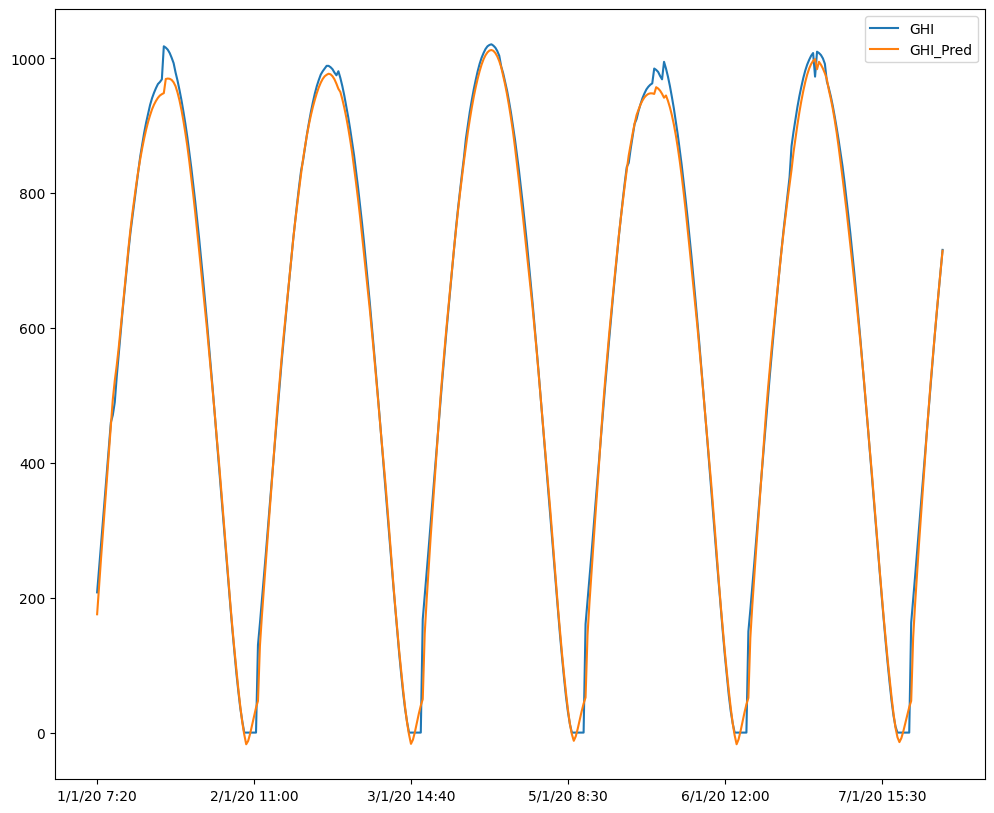

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(dt.Datetime.iloc[2:434],dt_final['GHI'].iloc[2:434])
plt.plot(dt.Datetime.iloc[2:434],dt_final['GHI_Pred'].iloc[2:434])

plt.legend(['GHI', 'GHI_Pred'])
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

In [ ]:
dt_final.head(1000)

,GHI,DHI,DNI,Temperature,Relative Humidity,Solar Zenith Angle,GHI_Pred
30995,141,50,490,29.3,11.25,79.33,40.713407
30996,174,56,539,29.9,10.87,77.37,128.197656
30997,208,61,583,30.5,10.50,75.40,175.502107
30998,243,66,620,31.1,10.15,73.42,217.909803
30999,279,71,654,31.8,9.76,71.43,258.581485
...,...,...,...,...,...,...,...
32728,215,113,313,36.1,10.10,71.01,246.570608
32729,237,130,299,36.6,9.83,69.00,264.119738
32730,351,75,705,37.0,9.62,66.98,284.989813
32731,303,151,359,37.5,9.36,64.97,344.843718


In [ ]:
actual_values = dt_final['GHI']
predicted_values = dt_final['GHI_Pred']
absolute_diff = abs(actual_values - predicted_values)
# Count the number of times the absolute difference is less than 40
count_less_than_40 = (absolute_diff <40).sum()
print("Number of times absolute difference < 40:", count_less_than_40)
print (len(actual_values))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(actual_values, predicted_values))
print ("Mean Sqaured Error:",rmse**2)
r2 = r2_score(actual_values, predicted_values)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:",r2)

Number of times absolute difference < 40: 9178
10285
Mean Sqaured Error: 1330.9717422858466
Root Mean Squared Error (RMSE): 36.482485418154376
R2 Score: 0.9831333353127903
